In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


##### unnamed column is weird and we will remove it

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


#### PREPROCESSING

##### no null values

In [9]:
df=df.iloc[:,1:] #all rows, and colums only from 1

In [10]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


#### EDA

In [11]:
import matplotlib.pyplot as plt

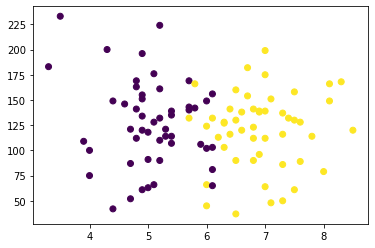

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #x axis cgpa y iq and colour coding the placment colum

##### c=df['placement'] assigns the 'placement' column from the DataFrame df as the color variable for the scatter plot. This means that the points in the scatter plot will be colored based on the corresponding values in the 'placement' column. 

#### Looking at this you can say that logistic regression can find a line that will classify whether placed or not

In [13]:
X=df.iloc[:,0:2]#independent var first two columns
y=df.iloc[:,-1]# dependent var last column

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

#### Splitting data into train and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#train_test_split(X,y,test_size=0.1)

##### the first part of the function returns the x train data then x test data then y train and finally y test

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)

#### SCALING

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

##### StandardScaler is a commonly used preprocessing class in scikit-learn (sklearn) for standardizing features or variables. Standardization, also known as z-score normalization, is a technique used to transform numerical data so that it has zero mean and unit variance. 

In [21]:
X_train=scaler.fit_transform(X_train)
#The transform method applies the standardization to the DataFrame df using the learned parameters (mean and standard deviation)
#from the fit step. It returns a NumPy array, where each feature has been standardized.

In [22]:
X_train

array([[ 1.13190012e+00, -1.80537848e+00],
       [ 6.95434777e-01, -8.28471443e-01],
       [-2.90976894e-03, -5.35399331e-01],
       [ 9.57313981e-01,  6.61311794e-01],
       [-2.35982261e+00,  1.44283743e+00],
       [ 8.70020913e-01, -1.46346102e+00],
       [-2.90976894e-03, -1.92749186e+00],
       [ 1.13190012e+00, -1.93481867e-01],
       [-8.75840451e-01, -1.44636515e-01],
       [-2.64788974e-01,  1.10091996e+00],
       [ 1.56836546e+00, -2.42327219e-01],
       [ 2.58969436e-01,  9.95902455e-02],
       [-8.75840451e-01, -1.48788369e+00],
       [ 1.30648625e+00, -1.53672905e+00],
       [-9.63133519e-01,  1.76033221e+00],
       [ 6.95434777e-01, -2.25231345e-02],
       [ 1.74295160e+00, -1.09712088e+00],
       [-2.90976894e-03,  1.89954147e-03],
       [ 1.71676367e-01, -2.66749895e-01],
       [ 1.83024466e+00,  1.02765193e+00],
       [ 3.46262504e-01, -1.93481867e-01],
       [ 8.70020913e-01,  1.24745602e+00],
       [ 1.30648625e+00,  8.32270526e-01],
       [ 8.

##### All values are now between -1 to 1

In [23]:
X_test=scaler.transform(X_test)

##### no need to fit the data anymore, pattern already established in train

In [24]:
X_test

array([[-0.09020284, -0.43770863],
       [-0.61396125, -0.07136849],
       [ 1.30648625,  0.1484356 ],
       [-0.00290977,  0.61246644],
       [-1.13771966, -1.75653313],
       [-0.26478897,  0.39266236],
       [-1.13771966, -0.07136849],
       [ 0.69543478, -0.29117257],
       [-1.22501272,  0.53919841],
       [ 1.39377932,  0.09959025]])

#### TRAIN MODEL

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf=LogisticRegression()

In [27]:
#training the model by just using the 'fit' function in the LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

#### MODEL EVALUATION

In [28]:
#testing the model using 'predict' function
clf.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [29]:
y_test

1     0
2     0
83    1
33    0
94    0
36    0
24    0
93    1
39    0
30    1
Name: placement, dtype: int64

In [30]:
y_pred=clf.predict(X_test)
#just storing the predicted values in this

#### USING Y_PRED AND Y_TEST WE CHECK THE ACCURACY SCORE

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9

##### Model is giving us 90% accuracy

##### Plotting/visualizing the accuracy using mlxted

In [33]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

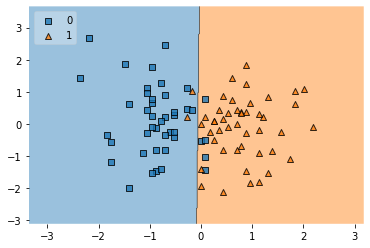

In [35]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
#In pandas, .values is an attribute used to get the underlying data of a DataFrame in the form of a NumPy array. 
#When you access .values,you obtain a 2-dimensional array (if the DataFrame has multiple columns) or a 1-dimensional array
#x_train was already standardized and converted into a numpy array, y_train.values will now be a numpy array

##### You can notice the mistakes the model is making, few triangles are on the square side and vice versa

In [38]:
import pickle
#converts the object to a file, you can use the file in any object

In [39]:
#converting clf to file
pickle.dump(clf, open('model.pkl','wb'))